# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

In [1]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# Métodos paramétricos de estimación

## Estimación Lineal por mínimos cuadráticos (LS) - Resumen

Para el siguiente modelo lineal:

$$\hat{y[k]} = \phi[k]^T\theta + \varepsilon[k]$$

Inicialmente consideremos el error como 0, por tanto el modelo se reduce a $\hat{y[k]} = \phi[k]^T\theta$. La idea de LS es minimizar el valor de error entre las mediciones $y[k]$ y los valores estimados $\theta$ elevados al cuadrado, por tanto la función de costo a minimizar sería:

$$f(\theta_{LS}) = (y - \phi\theta)^2$$

En la sección anterior se llegó a la conclusión que el vector de parámetros estimados es equivalente a:

$$\theta = [\phi^T.\phi]^{-1}.\phi^T.y$$

$$\theta_{LS} = \phi^+.y$$

## Estimación Lineal por mínimos cuadráticos con pesos (WLS)

Considerando que la señal del error es de media cero, pero que contiene varianzas distintas, se podría evaluar la siguiente función de costos, que considera para cada medición se divida en la varianza de dicha medición. Por tanto la función de costo no tendría unidades:

$$f_{WLS}(\theta) = \sum_{k=1}^{N}\frac{(y[k]-\phi^T.\theta)^2}{\sigma_{\epsilon}[k]^2}$$

En este caso, se puede introducir una matriz de pesos, denominada W y que estaría dada por la siguiente relación:

$$W = \begin{bmatrix}\sigma_{\epsilon}[1]^{-2}& & \\ & ... & \\ & &\sigma_{\epsilon}[N]^{-2}\end{bmatrix}$$

Se podría reescribir la función de costo de forma vectorial así:

$$f_{WLS}(\theta) = |y-\phi.\theta|^2.W$$

$$f_{WLS}(\theta) = (y-\phi.\theta)^T.W.(y-\phi.\theta)$$

Calculando el gradiente en función de teta y despejando el estimador se obtiene la siguiente relación:

$$\theta_{WLS} = (\phi^T.W.\phi)^{-1}.\phi^T.W.y$$

Otra forma de obtener el vector de los parámetros estimados es introducir la matriz $W^{1/2}$, que es equivalente a la raiz cuadrada de la matriz de pesos W.

$$W^{1/2} = \begin{bmatrix}\sigma_{\epsilon}[1]^{-1}& & \\ & ... & \\ & &\sigma_{\epsilon}[N]^{-1}\end{bmatrix}$$

Tal que: $W = W^{1/2}.W^{1/2}$

Sustituyendo en la función de costo se tiene lo siguiente:

$$f_{WLS}(\theta) = |W^{1/2}.(y-\phi.\theta)|^2 = |W^{1/2}.y-W^{1/2}.\phi.\theta)|^2 $$

Se introducen dos nuevos vectores como se indica a continuación para el vector normalizados de regresión y para los valores medidos normalizados:

$$\tilde{y} = W^{1/2}.y$$

$$\tilde{\phi} = W^{1/2}.\phi$$

Aplicando los criterios de optimalidad a esta función de costo (Calcular gradiente en función de $\theta$, despejando el estimador y teniendo en cuenta las 2 relaciones anteriores se podría indicar que el vector de parámetros estimados daría:

$$\theta_{WLS} = [\tilde{\phi}^T.\tilde{\phi}]^{-1}.\tilde{\phi}^T.\tilde{y}$$

$$\theta_{WLS} = \tilde{\phi}^+.\tilde{y}$$

Así que un problema de mínimos cuadrados con pesos, es solo un problema de mínimos cuadrados escalando la matriz de regresión y los valores medidos por la matriz $W^{1/2}$.

## Ejemplo 1:

Se espera poder determinar los parámetros de datos obtenidos de la siguiente relación lineal original: $y = -6 + 2x$. Además, se tiene un vector de mediciones de longitud 5, dado por la siguiente relación:
$$y[k] = \begin{bmatrix}y[1]\\y[2]\\...\\y[N]\end{bmatrix}=\begin{bmatrix}-5.996\\-4.008\\-1.997\\-0.009 \\ 2.009\end{bmatrix}$$.

Este vector ha sido contaminado por ruido y contiene error. Considere a su vez que x va de 0 a 4.

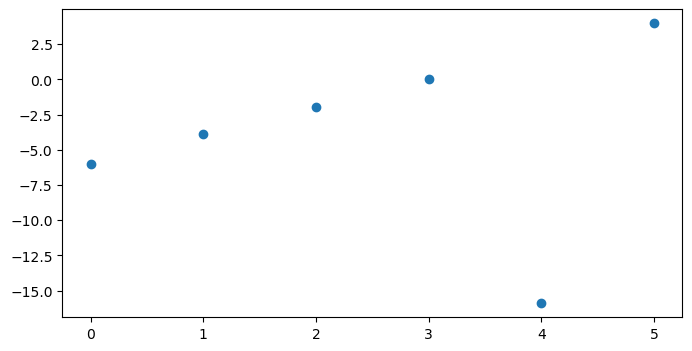

In [12]:
#Valores de x = 0, 1, 2, 3, 4
N = 6
x = np.linspace(0,5,N,dtype = "int")

#Valores medidos con un error y
y_v = np.array([-6,-4,-2,0,2,4])
y = np.array([-5.996,-3.9,-1.997,0.04,-15.9,3.98])
plt.figure(figsize=(8,4))
plt.scatter(x,y)

La matriz de regresión, al ser un modelo lineal estaría dada por: $\phi = \begin{bmatrix}1 & x[1]\\1 & x[2]\\1 & x[3]\\1 & x[4]\\1 & x[5]\end{bmatrix}$. 

Y se debe considerar las covarianzas dadas por:

$W = \begin{bmatrix}0.063^{-2}&0&0&0&0\\0&0.062^{-2}&0&0&0\\0&0&0.25^{-2}&0&0\\0&0&0&12345^{-2}&0\\0&0&0&0&0.248^{-2}\end{bmatrix}$

In [21]:
# La matriz de regresión considerando el modelo definido
ones = np.ones(N)
phi = np.array([ones,x]).transpose()

# Varianzas para cada yk
var = np.empty(N)
for k in range(N):
    val = (y[k]-y.std())**2/N;
    var[k] = 1/val;
    
_var = var**0.5
## Matriz de pesos (Covarianzas)
W = np.eye(N)*var
_W = np.eye(N)*_var
W
## Intentar encontrar una versión mejor de W donde los pesos de los datos atípicos sean pequeños


## SIN PESOS
_W = np.eye(N)
_W[4][4] = 0.0001

_W

array([[1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e-04, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00]])

Se debe calcular los vectores normalizados 
$$\tilde{y} = W^{1/2}.y$$

$$\tilde{\phi} = W^{1/2}.\phi$$

In [22]:
## Vectores "y" y "phi" Normalizados usando W
_y = np.dot(_W,y)
_phi = np.dot(_W,phi)
_y,      _phi

(array([-5.996e+00, -3.900e+00, -1.997e+00,  4.000e-02, -1.590e-03,
         3.980e+00]),
 array([[1.e+00, 0.e+00],
        [1.e+00, 1.e+00],
        [1.e+00, 2.e+00],
        [1.e+00, 3.e+00],
        [1.e-04, 4.e-04],
        [1.e+00, 5.e+00]]))

In [23]:
## Calculando los estimados THETA
phi_pr = np.dot(_phi.transpose(),_phi)
A = np.linalg.inv(phi_pr)
B = np.dot(_phi.transpose(),_y)

## Vector de parámetros estimados
theta = np.dot(A,B)
theta

array([-5.95179729,  1.98963511])

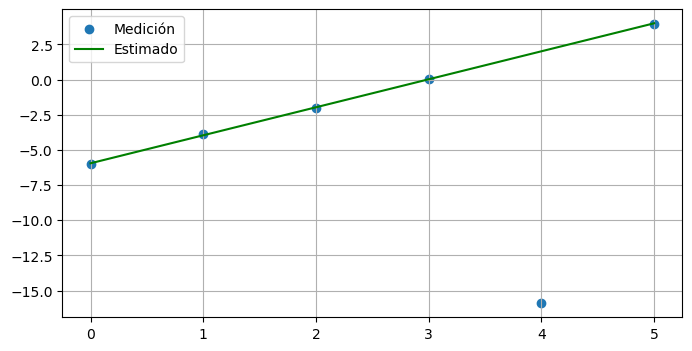

In [24]:
##  Estimación vs Medición
y_e = theta[0] + theta[1]*x

plt.figure(figsize=(8,4))
plt.scatter(x,y)
plt.plot(x,y_e, color = 'green')

plt.legend(["Medición","Estimado"])
plt.grid()

## Regularización de mínimos cuadráticos:

Un problema mal planteado de mínimos cuadrados puede originarse en el momento que la matriz MorePenrose no es invertible, o que la inversa de $[\tilde{\phi}^T.\tilde{\phi}]$ no existe. La regularización del problema restringe un poco más la solución del vector de parámetros estimados y plantea una posible solución de norma mínima. Depende de la escogencia de valores apropiados, pero el problema a resolver sería el siguiente:

$$f(\theta_{LS}) = \frac{1}{2}|y - \phi\theta|^2+ \frac{\alpha}{2}|\theta|^2$$


Minimizando la función objetivo e igualando a cero el gradiente:

$$\bigtriangledown f[\theta_{LS}] = -\phi^T.y + \phi^T.\phi.\theta + \alpha.\theta = 0$$

Despejando el valor de los parámetros:

$$\theta_{LS} = (\phi^T.\phi+\alpha.I)^{-1}.\phi^T.y$$

Recordar que para este caso, el vector $\phi$ hace referencia al vector de estimación y a las mediciones afectadas por los pesos en la sección anterior. Si se hace $\alpha = 0$ la expresión queda idéntica a la de mínimos cuadrados con pesos.

## [Ejercicio en Clase 3](ejercicio_03_LS_polinomio.ipynb)